# Machine Learning - Exercise 9
# Artificial Neural Networks for XOR problem

XOR function: f(x1,x2) -> {0,1}

D = {(0,0,0), (0,1,1), (1,0,1), (1,1,0)}

Non linearly separable.


## Import libraries

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Nadam

print('Tensorflow ',tf.__version__)
print('Keras ',tf.keras.__version__)


Tensorflow  2.9.2
Keras  2.9.0


## Create data set

Enable the noise flag to create a noisy XOR data set.

Fix random seed to repeat experiments.

In [ ]:
# random seed
rs = 20201108 # OK 
#rs = 20211107 # NO

np.random.seed(rs)
tf.random.set_seed(rs)

Set noise flag

In [ ]:
# generatining noisy data
noise = False

Generate the data set


Dataset: XOR
Number of features: 2
Number of samples: 4


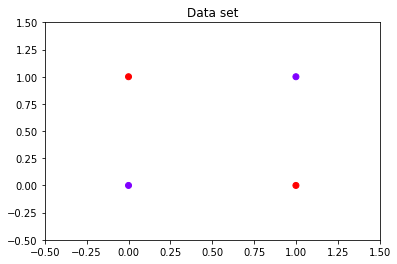

In [ ]:
# Define the XOR dataset
xor_db = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,0]], dtype=float)

if (noise):
  for i in range(4):
    for k in range(10):
      d = xor_db[i]
      d[0] += np.random.random()*0.2 - 0.1
      d[1] += np.random.random()*0.2 - 0.1
      xor_db = np.vstack([xor_db, d])

X = xor_db[:,0:-1]
t = xor_db[:,-1]

ninput = X.shape[1]
nsamples = X.shape[0]

print('Dataset: XOR')
print('Number of features: %d' %ninput)
print('Number of samples: %d' %nsamples)

# print options
np.set_printoptions(precision=3, formatter={'float':lambda x: '%6.3f' %x}, suppress=True)

# plot dataset

plt.title("Data set")
plt.xlim(xmin = -0.5, xmax = 1.5)
plt.ylim(ymin = -0.5, ymax = 1.5)

cm = plt.cm.get_cmap('rainbow')
plt.scatter(X[:,0], X[:,1], c=t, cmap=cm)

plt.show()

## ANN for XOR dataset

Create model with 2 layers:

hidden layer with two ReLU units, 

output layer with 1 linear unit.

Fix random seed to repreat experiments. Two values are given showing convergence to global vs. local minimum.

Define the model layout and 
parameters

In [ ]:
nh = 2 # nr. of hidden units
acth = 'relu' # activation function for hidden units
no = 1 # nr. of output units
acto = 'linear' # activation function for output unit
lossfn = 'mean_squared_error' # loss function

Choose the optimizer

In [ ]:
lrate = 0.001 # learning rate

#opt = SGD(learning_rate=lrate) # SGD optimizer
opt = RMSprop(learning_rate=lrate) # RMSprop optimizer

Create the ANN model

In [ ]:
# Create ANN model
model = Sequential()
model.add(Dense(nh, input_dim=ninput, activation=acth))
model.add(Dense(no, activation=acto))

model.compile(loss=lossfn, optimizer=opt, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


## Training

Training parameters

In [ ]:
nepochs = 100     # nr. of learning steps
batch_size = 8    # batch_size
niter = 0         # iteration counter
hv = []           # history vector (for plotting)

Training step

In [ ]:
for i in range(10):
  h = model.fit(X, t, batch_size=batch_size, epochs=nepochs, verbose=0)
  hv.append(h)
  niter += nepochs
  current_loss = h.history['loss'][len(h.history['loss'])-1]
  current_acc = h.history['accuracy'][len(h.history['accuracy'])-1]
  print("Iteration %d - Accuracy %.2f Loss %f" 
      %(niter,current_acc,current_loss))
  
  if (X.shape[0]==4):
    yp = model.predict(X)
    print("Test %s" %(np.transpose(yp)))
    print("-----------------------------------------------------")

## Plot results

In [ ]:
ploss = []
pacc = []

for i in range(len(hv)):
  ploss += hv[i].history['loss']
  pacc  += hv[i].history['accuracy']
print(len(ploss))

plt.title("Loss")
plt.ylim(-0.02,max(ploss))
plt.plot(ploss, color='red')
plt.show()

plt.title("Accuracy")
plt.ylim(min(pacc),1.02)
plt.plot(pacc, color='blue')
plt.show()


## Analysis of the model

In [ ]:
W = model.get_weights()
print('W = ',W)

H = []

for x in X:
  v = np.transpose(W[0]).dot(x) + W[1]
  h = max([0,0],list(v))  # relu
  H += [h]

H = np.array(H)
if H.shape[0]==4:
  print('H = ',H)

# plot h values

plt.title("Hidden layer values")

cm = plt.cm.get_cmap('rainbow')
plt.scatter(H[:,0], H[:,1], c=t, cmap=cm)

plt.show()


# Home Exercises

**Question 1**

Compare the results when using different values of the learning rate. 

**Question 2**

What happens when the learning rate is too high?

**Question 3**

Evaluate impact of random seed to performance, fill a line inside this shared sheet repeating the code in this exercise with your matricola code as random seed.

https://docs.google.com/spreadsheets/d/1ZH6QZWpEMj1Mwe_uTQWxHboSakBl8j30MqbgIhDSMjA